## Try to see the electeron gun signal and check the ratio between pixels and meV

This log is part of the data_analysis for 1st POLARIS XFEL beamtime at Desy, FLASH (Oct.2018)

Before we check the ratio, we have already known that the Pixels2EpConst is ~ 0.1654 from the computer setting

----------- 
 Created by  Hsin-Yi Wang (wang.hy@fysik.su.se), Date: 30-Sep-2018
- Note: This script shuld be operated under Python 3 environment 

### Import modules and useful function

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import h5py
import sys
from os import walk
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.insert(0, '../src/')
import fit_data_tools
from fit_data_tools import *

### Load image data and find the maxium position

['FLASH1_USER2_stream_2_run24928_file2_20180930T220356.1.h5'
 'FLASH1_USER2_stream_2_run24928_file1_20180930T220029.1.h5']


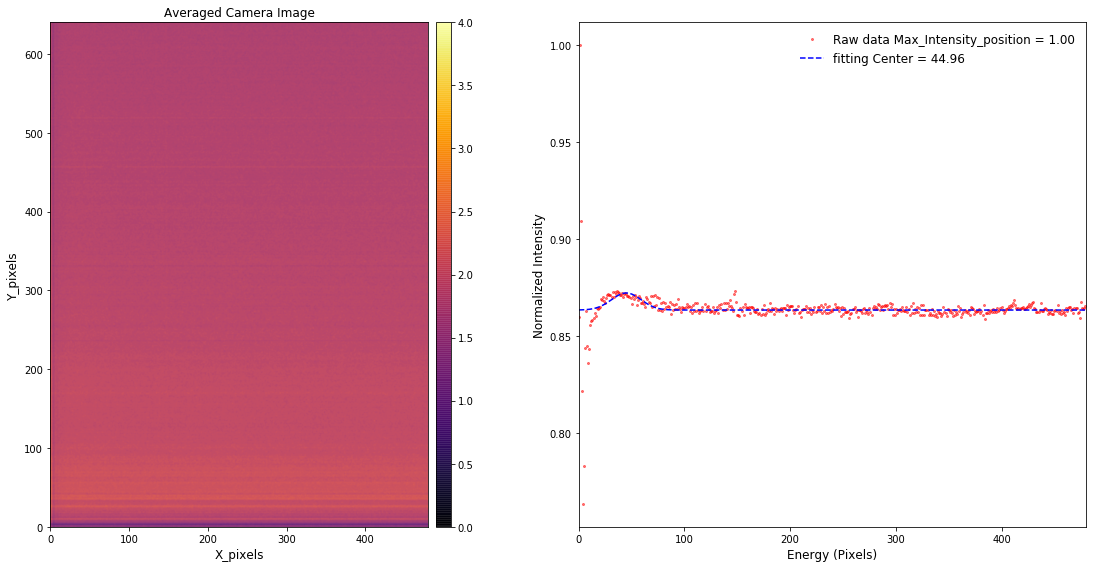

[44.963569663924204]


In [2]:
data_path = '/Users/hsin-yiwang/Desktop/Insitucell_for_XPS/FlashBeamtime/DATA/Electron_gun/'
data_names = discover_datas(data_path)
print (data_names)
Fit_center = []
Total_image = []
Total_shots = []
for i in range(len(data_names)):
    h5file = h5py.File(data_path+data_names[i], 'r')
    Image = h5file['/FL1/Experiment/Camera/PG/Basler FW 1/image/'].value
    thr = 3
    Image[Image<thr]=0
    N_shots = Image.shape[0]
    sum_image = np.sum(Image, axis = 0)
    Total_image.append(sum_image)
    Total_shots.append([N_shots])

plt.figure(figsize=[16,8])
    
ax = plt.subplot(1,2,1)
Avg_image = np.sum(Total_image, axis = 0)/np.sum(N_shots)
plt.imshow(Avg_image,vmin=0,vmax=4, origin='lower', interpolation='bicubic',cmap='inferno',alpha = 0.9)
plt.title('Averaged Camera Image',size=12)
plt.xlabel('X_pixels',size=12)
plt.ylabel('Y_pixels',size=12)
plt.xlim(0,480)
plt.ylim(0,640)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.1)
plt.colorbar(cax=cax)
plt.subplots_adjust(wspace=0.5)
    
plt.subplot(1,2,2)
xpixel = np.arange(Avg_image.shape[1])
Profile = np.sum(Avg_image,axis=0)
Profile /= float(max(Profile))
popt,xc,curve,perr = fit(gaussian,xpixel,Profile,p0=[max(Profile),50,1.,0.])
plt.plot(xpixel, Profile,'o',markersize=2,alpha=0.5,c='r',label = 'Raw data Max_Intensity_position = %.2f'%xpixel[Profile==max(Profile)])
plt.plot(xc,curve,ls = '--',c='blue',label = 'fitting Center = %.2f'%popt[1])
plt.xlabel('Energy (Pixels)',size=12)
plt.ylabel('Normalized Intensity',size=12)
plt.legend(frameon=False,loc='upper right', prop={'size': 12})
plt.xlim(0,480)
plt.tight_layout()
Fit_center.extend([popt[1]])
f_name = data_names[1][:-5]
plt.savefig('/Users/Hsin-YiWang/Desktop/%s.png'  %(f_name), dpi=300)
plt.show()
print(Fit_center)